# Libraries

In [1]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import matplotlib.ticker  as mtick
import seaborn            as sns
from mpl_toolkits.mplot3d import Axes3D
from __future__           import unicode_literals
from __future__           import division
from matplotlib.gridspec  import GridSpec

# Loading Dataset

In [2]:
my_data = np.loadtxt('../../Catalogue/Match07_small_mags_doubleclean_type.csv', delimiter=',', dtype=str)

In [3]:
my_dictionary = {}
for i in range(len(my_data[0, :])):                                         # Converting numpy array into dictionary
    my_dictionary[my_data[0, i]] = np.array(my_data[0 + 1:, i], dtype=str)

In [4]:
redshift     = my_dictionary['Z'].astype(float)
cataid       = my_dictionary['CATAID'].astype(str)
z_prob       = my_dictionary['PROB'].astype(float)
z_quality    = my_dictionary['NQ'].astype(int)
fuv_band     = my_dictionary['MAG_AB_FUV'].astype(float)   
nuv_band     = my_dictionary['MAG_AB_NUV'].astype(float)
u_band       = my_dictionary['MAG_AB_U'].astype(float)
g_band       = my_dictionary['MAG_AB_G'].astype(float)
r_band       = my_dictionary['MAG_AB_R'].astype(float)
mag_abs_r    = my_dictionary['MAG_ABSOLUTE_R'].astype(float)
stellar_mass = my_dictionary['logmstar'].astype(float)   # stellar mass from sed fitting - log scale
stellar_age  = my_dictionary['logage'].astype(float)     # stellar age - log scale
stellar_met  = my_dictionary['metal'].astype(float)      # stellar metallicity
dn4000       = my_dictionary['D4000N'].astype(float)     
h_alpha_flux = my_dictionary['HA_FLUX_COMP'].astype(float)    
h_alpha_ew   = my_dictionary['HA_EW_COMP'].astype(float)      
h_beta_flux  = my_dictionary['HB_FLUX_COMP'].astype(float)    
h_beta_ew    = my_dictionary['HB_EW_COMP'].astype(float)      
nii_flux     = my_dictionary['NIIR_FLUX_COMP'].astype(float)  # R for red or 6583A -- see http://www.gama-survey.org/dr3/schema/dmu.php?id=8
oiii_flux    = my_dictionary['OIIIR_EW_COMP'].astype(float)   # R for red or 5007A -- see http://www.gama-survey.org/dr3/schema/dmu.php?id=8
uv_class     = my_dictionary['UV_CLASS_YI2011'].astype(str)
obj_type     = my_dictionary['TYPE'].astype(int)

In [5]:
print np.unique(uv_class)

['RSF' 'UV_UPTURN' 'UV_WEAK']


### Redshift volume on which I intend to focus my analysis

In [6]:
z_min=0.06
z_max=0.40

### Selecting the subsample

In [7]:
# plt.hist(z_prob, bins=200)
# plt.yscale('log')
# plt.show()

In [8]:
indexes = np.arange(redshift.size)

In [9]:
index_all = indexes[(r_band>0)*(r_band<19.8)*(nuv_band>0)*(fuv_band>0)*((fuv_band-nuv_band)<50)
                     *((fuv_band-nuv_band)>(-20))*(redshift>=z_min)*(z_prob>0.8)*(obj_type==3)]

In [10]:
print my_data[index_all].shape

(14331, 162)


In [11]:
print (np.unique(cataid[index_all])).size

14331


# Characterizing the UV emission of the Galaxies
    

### Indices - UV upturn; UV weak; RSF; red sequence galaxies

In [12]:
index_uvup = np.where(((r_band>0)*(r_band<19.8)*(nuv_band>0)*(fuv_band>0)*(nuv_band-r_band)>5.4)
                      *(fuv_band-nuv_band<0.9)*(fuv_band-r_band<6.6)*(fuv_band-nuv_band<50)*(fuv_band-nuv_band>-20)
                      *(redshift>=z_min))

In [13]:
index_rsf = np.where(((r_band>0)*(r_band<19.8)*(nuv_band>0)*(fuv_band>0)*(nuv_band-r_band)<5.4)
                     *(fuv_band-nuv_band<50)*(fuv_band-nuv_band>-20)*(redshift>=z_min))

In [14]:
index_uvweak = np.where(((r_band>0)*(r_band<19.8)*(nuv_band>0)*(fuv_band>0)*(nuv_band-r_band)>5.4)
                        *((fuv_band-r_band)>6.6)*(fuv_band-nuv_band<50)*(fuv_band-nuv_band>-20)*(redshift>=z_min))

In [15]:
index_redsequence = np.where(((r_band>0)*(r_band<19.8)*(nuv_band>0)*(fuv_band>0)*(nuv_band-r_band)>5.4)
                             *(fuv_band-nuv_band<50)*(fuv_band-nuv_band>-20)*(redshift>=z_min))

In [16]:
plt.rcParams.keys()

['_internal.classic_mode',
 'agg.path.chunksize',
 'animation.avconv_args',
 'animation.avconv_path',
 'animation.bitrate',
 'animation.codec',
 'animation.convert_args',
 'animation.convert_path',
 'animation.embed_limit',
 'animation.ffmpeg_args',
 'animation.ffmpeg_path',
 'animation.frame_format',
 'animation.html',
 'animation.html_args',
 'animation.writer',
 'axes.autolimit_mode',
 'axes.axisbelow',
 'axes.edgecolor',
 'axes.facecolor',
 'axes.formatter.limits',
 'axes.formatter.min_exponent',
 'axes.formatter.offset_threshold',
 'axes.formatter.use_locale',
 'axes.formatter.use_mathtext',
 'axes.formatter.useoffset',
 'axes.grid',
 'axes.grid.axis',
 'axes.grid.which',
 'axes.hold',
 'axes.labelcolor',
 'axes.labelpad',
 'axes.labelsize',
 'axes.labelweight',
 'axes.linewidth',
 'axes.prop_cycle',
 'axes.spines.bottom',
 'axes.spines.left',
 'axes.spines.right',
 'axes.spines.top',
 'axes.titlepad',
 'axes.titlesize',
 'axes.titleweight',
 'axes.unicode_minus',
 'axes.xmargin',

# Plot parameters

In [17]:
plotpars = {'axes.linewidth': 1.,
            'axes.labelsize': 18,
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
            'legend.frameon': True,
            'legend.framealpha': 0.85,
            'legend.edgecolor': 'black',
            'legend.loc': 'upper right',
            'legend.fontsize': 12,
            'font.size': 12,
            'figure.figsize': (7.,5.)
           }

# Plot 01: Yi et al. (2011) UV diagnosis plot

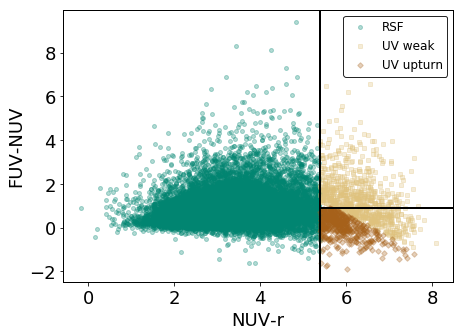

In [18]:
plt.rcParams.update(plotpars)
plot01, = plt.plot((nuv_band - r_band)[index_rsf], (fuv_band - nuv_band)[index_rsf], 'o', markersize=4, 
                   color = '#018571', alpha=0.3, label="RSF")
plot02, = plt.plot((nuv_band - r_band)[index_uvweak], (fuv_band - nuv_band)[index_uvweak], 's', 
                   markersize=4, color = '#dfc27d', alpha=0.3, label="UV weak")
plot03, = plt.plot((nuv_band - r_band)[index_uvup], (fuv_band - nuv_band)[index_uvup], 'D', markersize=4, 
                   color = '#a6611a', alpha=0.3, label="UV upturn")
plt.legend(loc='best')
plt.axvline(x=5.4, color='black', linewidth=2.)
plt.axhline(y=0.9, xmin=0.659, xmax=2, color='black', linewidth=2.)
plt.xlabel("NUV-r")
plt.ylabel("FUV-NUV")
plt.savefig('../../Figs/g2_maglim_yi_diagram.pdf')
plt.savefig('../../Figs/g2_maglim_yi_diagram.png')
plt.show()

# Characterizing the emission-lines profile of these objects

### BPT

In [19]:
xbpt_k01 = np.linspace(-2.2, 0.4, 1000)     # Kewley et al. 2001
xbpt_k03 = np.linspace(-2.2, -0.01, 1000)   # Kaufmann et al. 2003
xbpt_s06 = np.linspace(-2.2, -0.05, 1000)   # Stasinska et al. 2006
xbpt_s07 = np.linspace(-0.182, 2.0, 1000)   # Schawinski et al. 2007

In [20]:
ybpt_k01 = []
for j in range(len(xbpt_k01)):
    ybpt_k01j = 0.61 / (xbpt_k01[j] - 0.47) + 1.19  # Kewyley et al. 2001
    ybpt_k01.append(ybpt_k01j)
ybpt_k01 = np.array(ybpt_k01)

In [21]:
ybpt_k03 = []
for j in range(len(xbpt_k03)):
    ybpt_k03j = 0.61 / (xbpt_k03[j] - 0.05) + 1.3  # Kaufmann et al. 2003
    ybpt_k03.append(ybpt_k03j)
ybpt_k03 = np.array(ybpt_k03)

In [22]:
ybpt_s06 = []
for j in range(len(xbpt_s06)):
    # Stasinska et al. 2006
    ybpt_s06j = (-30.787 + (1.1358 * xbpt_s06[j]) + 0.27297) * np.tanh(5.7409 * xbpt_s06[j]) - 31.093 
    ybpt_s06.append(ybpt_s06j)
ybpt_s06 = np.array(ybpt_s06)

In [23]:
ybpt_s07 = []
for j in range(len(xbpt_s07)):
    ybpt_s07j = 1.05 * xbpt_s07[j] + 0.45    # Schawinski et al. 2007 
    ybpt_s07.append(ybpt_s07j)
ybpt_s07 = np.array(ybpt_s07)

### New indices for emission lines - cleaning the trash

In [24]:
print np.unique(np.isnan(h_alpha_flux[index_all]))               #is there any NAN value?
print np.unique(np.isinf(h_alpha_flux[index_all]))               #is there any infinite value?
print h_alpha_flux[index_all][[h_alpha_flux[index_all]==0]].size #total amount of zeroes
print h_alpha_flux[index_all].size                               #total size of the sample
print h_alpha_flux[index_all].size - h_alpha_flux[index_all][[h_alpha_flux[index_all]==0]].size #removing the zeroes

[False]
[False]
115
14331
14216


/home/mlldantas/anaconda3/envs/py2k7/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mlldantas/anaconda3/envs/py2k7/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


In [25]:
idx_bpt_clean = np.where((np.logical_not(np.isnan(np.log10(nii_flux[index_all]/h_alpha_flux[index_all]))))
                           *(np.logical_not(np.isinf(np.log10(nii_flux[index_all]/h_alpha_flux[index_all]))))
                           *(np.logical_not(np.isnan(np.log10(oiii_flux[index_all]/h_beta_flux[index_all]))))
                           *(np.logical_not(np.isinf(np.log10(oiii_flux[index_all]/h_beta_flux[index_all]))))
                           *(np.logical_not(h_alpha_flux[index_all]<=0))*(np.logical_not(h_beta_flux[index_all]<=0))
                           *(np.logical_not(nii_flux[index_all]<=0))*(np.logical_not(oiii_flux[index_all]<=0)))

/home/mlldantas/anaconda3/envs/py2k7/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/home/mlldantas/anaconda3/envs/py2k7/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


In [26]:
idx_whan_clean = np.where((np.logical_not(np.isnan(np.log10(nii_flux[index_all]/h_alpha_flux[index_all]))))
                          *(np.logical_not(np.isinf(np.log10(nii_flux[index_all]/h_alpha_flux[index_all]))))
                          *(np.logical_not(np.isnan(np.log10(h_alpha_ew[index_all]))))
                          *(np.logical_not(np.isinf(np.log10(h_alpha_ew[index_all]))))
                          *(np.logical_not(h_alpha_flux[index_all]<=0))*(np.logical_not(nii_flux[index_all]<=0))
                          *(np.logical_not(h_alpha_ew[index_all]<=0)))

/home/mlldantas/anaconda3/envs/py2k7/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/home/mlldantas/anaconda3/envs/py2k7/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  
/home/mlldantas/anaconda3/envs/py2k7/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


In [27]:
print redshift[index_all][idx_bpt_clean].size
print redshift[index_all][idx_whan_clean].size

11647
13050


In [28]:
print redshift[index_all].size-redshift[index_all][idx_bpt_clean].size

2684


In [29]:
# for i in range(h_alpha_flux[index_all][idx_bpt_clean].size):
#     print h_alpha_flux[index_all][idx_bpt_clean][i]

### Creating new arrays of clean h alpha, h beta, nii, oiii to simplify the notation

#### BPT

In [30]:
h_alpha_flux_bpt = h_alpha_flux[index_all][idx_bpt_clean]
h_beta_flux_bpt  = h_beta_flux[index_all][idx_bpt_clean]
nii_flux_bpt     = nii_flux[index_all][idx_bpt_clean]
oiii_flux_bpt    = oiii_flux[index_all][idx_bpt_clean]
uv_class_bpt     = uv_class[index_all][idx_bpt_clean]

In [31]:
print h_alpha_flux_bpt.size
print uv_class_bpt.size

11647
11647


In [32]:
print np.unique(uv_class_bpt)

['RSF' 'UV_UPTURN' 'UV_WEAK']


In [33]:
idx_uvup_bpt = np.where(uv_class_bpt=='UV_UPTURN')

In [34]:
idx_uvwk_bpt = np.where(uv_class_bpt=='UV_WEAK')

In [35]:
idx_rsf_bpt = np.where(uv_class_bpt=='RSF')

#### WHAN

In [36]:
h_alpha_flux_whan = h_alpha_flux[index_all][idx_whan_clean]
h_beta_flux_whan  = h_beta_flux[index_all][idx_whan_clean]
nii_flux_whan     = nii_flux[index_all][idx_whan_clean]
h_alpha_ew_whan   = h_alpha_ew[index_all][idx_whan_clean]
uv_class_whan     = uv_class[index_all][idx_whan_clean]

In [37]:
print h_alpha_flux_whan.size
print uv_class_whan.size

13050
13050


In [38]:
print np.unique(uv_class_whan)

['RSF' 'UV_UPTURN' 'UV_WEAK']


In [39]:
idx_uvup_whan = np.where(uv_class_whan=='UV_UPTURN')

In [40]:
idx_uvwk_whan = np.where(uv_class_whan=='UV_WEAK')

In [41]:
idx_rsf_whan = np.where(uv_class_whan=='RSF')

### All BPT settings

#### X-axis

In [42]:
xbpt = np.log10(nii_flux_bpt/h_alpha_flux_bpt)

In [43]:
xbpt_uvup = np.log10(nii_flux_bpt[idx_uvup_bpt]/h_alpha_flux_bpt[idx_uvup_bpt])
xbpt_uvwk = np.log10(nii_flux_bpt[idx_uvwk_bpt]/h_alpha_flux_bpt[idx_uvwk_bpt])
xbpt_rsf  = np.log10(nii_flux_bpt[idx_rsf_bpt]/h_alpha_flux_bpt[idx_rsf_bpt])

#### Y-axis

In [44]:
ybpt = np.log10(oiii_flux_bpt/h_beta_flux_bpt)

In [45]:
ybpt_uvup = np.log10(oiii_flux_bpt[idx_uvup_bpt]/h_beta_flux_bpt[idx_uvup_bpt])
ybpt_uvwk = np.log10(oiii_flux_bpt[idx_uvwk_bpt]/h_beta_flux_bpt[idx_uvwk_bpt])
ybpt_rsf  = np.log10(oiii_flux_bpt[idx_rsf_bpt]/h_beta_flux_bpt[idx_rsf_bpt])

### All WHAN settings

#### X-axis

In [46]:
xwhan = np.log10(nii_flux_whan/h_alpha_flux_whan)

In [47]:
xwhan_uvup = np.log10(nii_flux_whan[idx_uvup_whan]/h_alpha_flux_whan[idx_uvup_whan])
xwhan_uvwk = np.log10(nii_flux_whan[idx_uvwk_whan]/h_alpha_flux_whan[idx_uvwk_whan])
xwhan_rsf  = np.log10(nii_flux_whan[idx_rsf_whan]/h_alpha_flux_whan[idx_rsf_whan])

#### Y-axis

In [48]:
ywhan = np.log10(h_alpha_ew_whan)

In [49]:
ywhan_uvup = np.log10(h_alpha_ew_whan[idx_uvup_whan])
ywhan_uvwk = np.log10(h_alpha_ew_whan[idx_uvwk_whan])
ywhan_rsf  = np.log10(h_alpha_ew_whan[idx_rsf_whan])

In [50]:
print xbpt_rsf.size, ybpt_rsf.size
print xwhan_rsf.size, ywhan_rsf.size

11423 11423
12635 12635


In [51]:
print xwhan.size
print (xwhan_uvup.size+xwhan_uvwk.size+xwhan_rsf.size)

13050
13050


# Plot 02: BPT and WHAN

In [52]:
plt.rcParams.keys()

['_internal.classic_mode',
 'agg.path.chunksize',
 'animation.avconv_args',
 'animation.avconv_path',
 'animation.bitrate',
 'animation.codec',
 'animation.convert_args',
 'animation.convert_path',
 'animation.embed_limit',
 'animation.ffmpeg_args',
 'animation.ffmpeg_path',
 'animation.frame_format',
 'animation.html',
 'animation.html_args',
 'animation.writer',
 'axes.autolimit_mode',
 'axes.axisbelow',
 'axes.edgecolor',
 'axes.facecolor',
 'axes.formatter.limits',
 'axes.formatter.min_exponent',
 'axes.formatter.offset_threshold',
 'axes.formatter.use_locale',
 'axes.formatter.use_mathtext',
 'axes.formatter.useoffset',
 'axes.grid',
 'axes.grid.axis',
 'axes.grid.which',
 'axes.hold',
 'axes.labelcolor',
 'axes.labelpad',
 'axes.labelsize',
 'axes.labelweight',
 'axes.linewidth',
 'axes.prop_cycle',
 'axes.spines.bottom',
 'axes.spines.left',
 'axes.spines.right',
 'axes.spines.top',
 'axes.titlepad',
 'axes.titlesize',
 'axes.titleweight',
 'axes.unicode_minus',
 'axes.xmargin',

In [53]:
# INITIAL SETTINGS
plotpars_2cols = {'axes.linewidth': 1.,
                  'axes.labelsize': 18,
                  'xtick.labelsize': 18,
                  'ytick.labelsize': 18,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'upper right',
                  'legend.fontsize': 12,
                  'font.size':12,
                  'figure.figsize': (6, 9)
                 }

arrow_props = dict(arrowstyle='wedge',facecolor='black',connectionstyle="angle3,angleA=90,angleB=0")
text_bbox   = dict(facecolor='#f7f7f7', edgecolor='black', boxstyle='round')

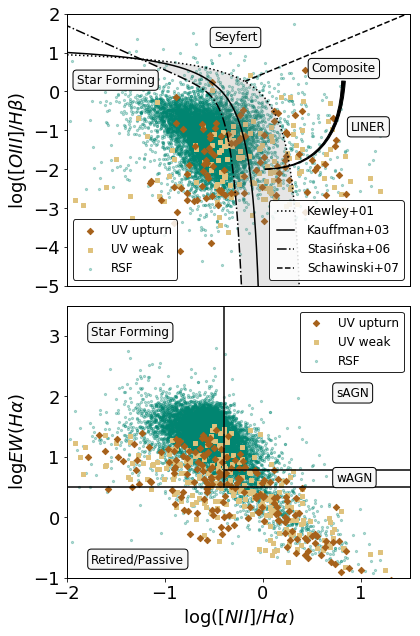

In [54]:
plt.rcParams.update(plotpars_2cols)

# FIRST PLOT -- BPT
bplot = plt.subplot(2,1,1)
plot01c = plt.scatter(xbpt_rsf, ybpt_rsf,   c='#018571', s=5, alpha=0.3, marker='o')
plot01b = plt.scatter(xbpt_uvwk, ybpt_uvwk, c='#dfc27d', s=10, alpha=1, marker='s')
plot01a = plt.scatter(xbpt_uvup, ybpt_uvup, c='#a6611a', s=20, alpha=1, marker='D')
plot02, = plt.plot(xbpt_k01, ybpt_k01, ':', color='black',  label='Kewley+01')
plot03, = plt.plot(xbpt_k03, ybpt_k03, '-', color='black',  label='Kauffman+03')
plot04, = plt.plot(xbpt_s06, ybpt_s06, '-.', color='black', label='Stasinska+06')
plot05, = plt.plot(xbpt_s07, ybpt_s07, '--', color='black', label='Schawinski+07')
bplot.xaxis.set_visible(False)
l1 = plt.legend([plot01a, plot01b, plot01c], [r"UV upturn", r"UV weak", r"RSF"], numpoints=1, loc='lower left', 
                frameon=True, framealpha=0.85)
l2 = plt.legend([plot02, plot03, plot04, plot05], [r"Kewley+01", r"Kauffman+03", r"Stasińska+06", r"Schawinski+07"],
          numpoints=4, loc='lower right', frameon=True, framealpha=0.85)
# l1.get_frame().set_edgecolor('black')
# l2.get_frame().set_edgecolor('black')
plt.gca().add_artist(l1)
plt.fill_betweenx(ybpt_k01, xbpt_k01, xbpt_s06, where=(xbpt_s06>-1.242)*(ybpt_s06<0.835), facecolor='gray', alpha=0.2)
plt.fill_between(xbpt_s06, ybpt_k01, ybpt_s06, where=(xbpt_s06>-1.242)*(ybpt_k01<0.835), facecolor='gray', alpha=0.2)
plt.ylabel(r"$\log (\left[OIII\right]/H \beta) $")
plt.text(-1.9, 0.2, r"Star Forming", bbox=text_bbox)
plt.text(-0.5, 1.3, r"Seyfert", bbox=text_bbox)
plt.text(0.9, -1, r"LINER", bbox=text_bbox)
plt.annotate(r"Composite", xy=(0., -2), xycoords='data', xytext=(0.5, 0.5), arrowprops=arrow_props, bbox=text_bbox)
plt.xlim([-2, 1.5])
plt.ylim([-5, 2])

# SECOND PLOT -- WHAN DIAGRAM
plt.rcParams.update(plotpars)
wplot = plt.subplot(2,1,2, sharex=bplot)
wa = plt.scatter(xwhan_rsf,  ywhan_rsf,  c='#018571', s=5,  alpha=0.3, marker='o')
wb = plt.scatter(xwhan_uvwk, ywhan_uvwk, c='#dfc27d', s=10, alpha=1.0, marker='s')
wc = plt.scatter(xwhan_uvup, ywhan_uvup, c='#a6611a', s=20, alpha=1.0, marker='D')
l3 = plt.legend([wc, wb, wa], [r"UV upturn", r"UV weak", r"RSF"], numpoints=1, loc='upper right')
# l3.get_frame().set_edgecolor('black')
plt.axvline(x=-0.4, ymin=.332, ymax=3.5, color='black', linewidth=1.5)
plt.axhline(y=+0.5, color='black', linewidth=1.5)
plt.axhline(y=0.78, xmin=0.46, xmax=1, color='black', linewidth=1.5)
plt.xlabel(r"$\log ([NII]/H{\alpha})$")
plt.ylabel(r"$\log EW(H{\alpha})$")
plt.text(-1.75, -0.75, r"Retired/Passive", bbox=text_bbox)
plt.text(0.75, 2.0, r"sAGN", bbox=text_bbox)
plt.text(0.75, 0.6, r"wAGN", bbox=text_bbox)
plt.text(-1.75, 3, r"Star Forming", bbox=text_bbox)
plt.xlim([-2, 1.5])
plt.ylim([-1.0, 3.5])

# FINAL SETTINGS
plt.tight_layout()
plt.savefig('../../Figs/g2_bptwhan.pdf', bbox_inch='tight')
plt.savefig('../../Figs/g2_bptwhan.png', bbox_inch='tight')
plt.show()

# Plot 03: BPT and WHAN fragmented

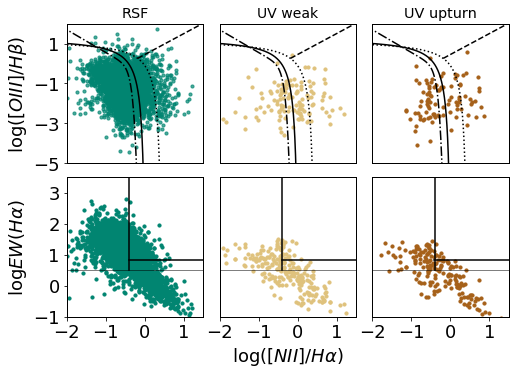

In [55]:
bpt_xlim  = [-2, 1.5]
bpt_ylim  = [-5, 2]
whan_xlim = [-2, 1.5]
whan_ylim = [-1.0, 3.5]

plt.rcParams.update(plotpars)
# BPT
## RSF
ax1=plt.subplot(2,3,1)
plot01c = plt.scatter(xbpt_rsf, ybpt_rsf, c='#018571', s=10, alpha=0.7, label='RSF')
plot02, = plt.plot(xbpt_k01, ybpt_k01, ':', color='black',  label='Kewley+01')
plot03, = plt.plot(xbpt_k03, ybpt_k03, '-', color='black',  label='Kauffman+03')
plot04, = plt.plot(xbpt_s06, ybpt_s06, '-.', color='black', label='Stasinska+06')
plot05, = plt.plot(xbpt_s07, ybpt_s07, '--', color='black', label='Schawinski+07')
plt.ylabel(r"$\log (\left[OIII\right]/H \beta) $")
ax1.xaxis.set_visible(False)
plt.title("RSF")
plt.xlim(bpt_xlim)
plt.ylim(bpt_ylim)
plt.tick_params('both')
plt.xticks(np.arange(bpt_xlim[0], bpt_xlim[1], 1.))
plt.yticks(np.arange(bpt_ylim[0], bpt_ylim[1], 2))


## UV Weak
ax2=plt.subplot(2,3,2)
plot01b = plt.scatter(xbpt_uvwk, ybpt_uvwk, c='#dfc27d', s=10, alpha=1, label='UV weak')
plot02, = plt.plot(xbpt_k01, ybpt_k01, ':', color='black',  label='Kewley+01')
plot03, = plt.plot(xbpt_k03, ybpt_k03, '-', color='black',  label='Kauffman+03')
plot04, = plt.plot(xbpt_s06, ybpt_s06, '-.', color='black', label='Stasinska+06')
plot05, = plt.plot(xbpt_s07, ybpt_s07, '--', color='black', label='Schawinski+07')
plt.title("UV weak", fontsize=14)
plt.xlim(bpt_xlim)
plt.ylim(bpt_ylim)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
plt.tick_params('both')
plt.xticks(np.arange(bpt_xlim[0], bpt_xlim[1], 1.))

## UV Upturn
ax3=plt.subplot(2,3,3)
plot01a = plt.scatter(xbpt_uvup, ybpt_uvup, c='#a6611a', s=10, alpha=1, label='UV upturn')
plot02, = plt.plot(xbpt_k01, ybpt_k01, ':', color='black',  label='Kewley+01')
plot03, = plt.plot(xbpt_k03, ybpt_k03, '-', color='black',  label='Kauffman+03')
plot04, = plt.plot(xbpt_s06, ybpt_s06, '-.', color='black', label='Stasinska+06')
plot05, = plt.plot(xbpt_s07, ybpt_s07, '--', color='black', label='Schawinski+07')
plt.title("UV upturn")
plt.xlim(bpt_xlim)
plt.ylim(bpt_ylim)
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
plt.tick_params('both')
plt.xticks(np.arange(bpt_xlim[0], bpt_xlim[1], 1.))

# WHAN 
## RSF
ax4=plt.subplot(2,3,4)
plot01c = plt.scatter(xwhan_rsf, ywhan_rsf,   c='#018571', s=10,  alpha=1, label='RSF')
plt.axvline(x=-0.4, ymin=.332, ymax=3.5, color='black', linewidth=1.5)
plt.axhline(y=+0.5, color='black', linewidth=0.5)
plt.axhline(y=0.82, xmin=0.455, xmax=1, color='black', linewidth=1.5)
plt.ylabel(r"$\log EW(H{\alpha})$", fontweight='bold')
plt.xlim(whan_xlim)
plt.ylim(whan_ylim)
plt.tick_params('both')
plt.xticks(np.arange(whan_xlim[0], whan_xlim[1], 1.))
plt.yticks(np.arange(whan_ylim[0], whan_ylim[1], 1.))

ax5=plt.subplot(2,3,5)
plot01b = plt.scatter(xwhan_uvwk, ywhan_uvwk, c='#dfc27d', s=10, alpha=1., label='UV weak')
plt.axvline(x=-0.4, ymin=.332, ymax=3.5, color='black', linewidth=1.5)
plt.axhline(y=+0.5, color='black', linewidth=0.5)
plt.axhline(y=0.82, xmin=0.455, xmax=1, color='black', linewidth=1.5)
plt.xlabel(r"$\log ([NII]/H{\alpha})$")
plt.xlim(whan_xlim)
plt.ylim(whan_ylim)
ax5.yaxis.set_visible(False)
plt.tick_params('both')
plt.xticks(np.arange(whan_xlim[0], whan_xlim[1], 1.))

ax6=plt.subplot(2,3,6)
plot01a = plt.scatter(xwhan_uvup, ywhan_uvup, c='#a6611a', s=10, alpha=1, label='UV upturn')
plt.axvline(x=-0.4, ymin=.332, ymax=3.5, color='black', linewidth=1.5)
plt.axhline(y=+0.5, color='black', linewidth=0.5)
plt.axhline(y=0.82, xmin=0.455, xmax=1, color='black', linewidth=1.5)
plt.xlim(whan_xlim)
plt.ylim(whan_ylim)
ax6.yaxis.set_visible(False)
plt.tick_params('both')
plt.xticks(np.arange(whan_xlim[0], whan_xlim[1], 1.))

plt.tight_layout(pad=-0.05)
plt.savefig('../../Figs/g2_bptwhan_split.pdf', bbox_inch='tight')
plt.savefig('../../Figs/g2_bptwhan_split.png', bbox_inch='tight')
plt.show()

## Analysing the impact of the cross-correlation between BPT, WHAN and UV classes

In [56]:
print xbpt.size
print xwhan.size

11647
13050


In [57]:
whan_class = []
for i in range(xwhan.size):
    if (xwhan[i]<-0.4)*(ywhan[i]>0.5):
        whan_class_i = 'SF'
    elif (xwhan[i]>-0.4)*(ywhan[i]>0.82):
        whan_class_i = 'sAGN'
    elif (xwhan[i]>-0.4)*(ywhan[i]<0.82)*(ywhan[i]>0.5):
        whan_class_i = 'wAGN'
    elif (ywhan[i]<0.5):
        whan_class_i = 'Retired/Passive'    
    else:
        print 'error'
    
    whan_class.append(whan_class_i)
whan_class = np.array(whan_class)

In [58]:
idx_sf   = np.where(whan_class=='SF')
idx_sagn = np.where(whan_class=='sAGN')
idx_wagn = np.where(whan_class=='wAGN')
idx_rp   = np.where(whan_class=='Retired/Passive')

##### I now have both classifications: UV and WHAN. Let's crossmatch these informations and count the amount of galaxies in each situation.

In [59]:
print r"RSF objects in SF region in WHAN diagram is %d" % list(uv_class_whan[idx_sf]).count('RSF')
print r"UV weak objects in SF region in WHAN diagram is %d" % list(uv_class_whan[idx_sf]).count('UV_WEAK')
print r"UV upturn objects in SF region in WHAN diagram is %d" % list(uv_class_whan[idx_sf]).count('UV_UPTURN')

RSF objects in SF region in WHAN diagram is 9253
UV weak objects in SF region in WHAN diagram is 78
UV upturn objects in SF region in WHAN diagram is 68


In [60]:
print r"RSF objects in sAGN region in WHAN diagram is %d" % list(uv_class_whan[idx_sagn]).count('RSF')
print r"UV weak objects in sAGN region in WHAN diagram is %d" % list(uv_class_whan[idx_sagn]).count('UV_WEAK')
print r"UV upturn objects in sAGN region in WHAN diagram is %d" % list(uv_class_whan[idx_sagn]).count('UV_UPTURN')

RSF objects in sAGN region in WHAN diagram is 2156
UV weak objects in sAGN region in WHAN diagram is 19
UV upturn objects in sAGN region in WHAN diagram is 9


In [61]:
print r"RSF objects in wAGN region in WHAN diagram is %d" % list(uv_class_whan[idx_wagn]).count('RSF')
print r"UV weak objects in wAGN region in WHAN diagram is %d" % list(uv_class_whan[idx_wagn]).count('UV_WEAK')
print r"UV upturn objects in wAGN region in WHAN diagram is %d" % list(uv_class_whan[idx_wagn]).count('UV_UPTURN')

RSF objects in wAGN region in WHAN diagram is 557
UV weak objects in wAGN region in WHAN diagram is 19
UV upturn objects in wAGN region in WHAN diagram is 17


In [62]:
print r"RSF objects in Retired/Passive region in WHAN diagram is %d" % list(uv_class_whan[idx_rp]).count('RSF')
print r"UV weak objects in Retired/Passive region in WHAN diagram is %d" % list(uv_class_whan[idx_rp]).count('UV_WEAK')
print r"UV upturn objects in Retired/Passive region in WHAN diagram is %d" % list(uv_class_whan[idx_rp]).count('UV_UPTURN')

RSF objects in Retired/Passive region in WHAN diagram is 669
UV weak objects in Retired/Passive region in WHAN diagram is 118
UV upturn objects in Retired/Passive region in WHAN diagram is 87


####  Printing the same information above for latex table

In [63]:
print "UV Classification & SF & sAGN & wAGN & Retired/Passive \\"
print "RSF               & %d & %d   & %d   & %d \\ " % (list(uv_class_whan[idx_sf]).count('RSF'), 
                                                         list(uv_class_whan[idx_sagn]).count('RSF'), 
                                                         list(uv_class_whan[idx_wagn]).count('RSF'), 
                                                         list(uv_class_whan[idx_rp]).count('RSF'))
print "UV weak           & %d & %d   & %d   & %d \\ " % (list(uv_class_whan[idx_sf]).count('UV_WEAK'), 
                                                         list(uv_class_whan[idx_sagn]).count('UV_WEAK'), 
                                                         list(uv_class_whan[idx_wagn]).count('UV_WEAK'), 
                                                         list(uv_class_whan[idx_rp]).count('UV_WEAK'))
print "UV upturn         & %d & %d   & %d   & %d \\ " % (list(uv_class_whan[idx_sf]).count('UV_UPTURN'), 
                                                         list(uv_class_whan[idx_sagn]).count('UV_UPTURN'), 
                                                         list(uv_class_whan[idx_wagn]).count('UV_UPTURN'), 
                                                         list(uv_class_whan[idx_rp]).count('UV_UPTURN'))

UV Classification & SF & sAGN & wAGN & Retired/Passive \
RSF               & 9253 & 2156   & 557   & 669 \ 
UV weak           & 78 & 19   & 19   & 118 \ 
UV upturn         & 68 & 9   & 17   & 87 \ 


#### Estimating the amount of objects in each category of the BPT diagram

In [64]:
bpt_class = []
idx_co = []
idx_sf = []
idx_sy = []
idx_ln = []

for i in range(xbpt.size):
    # checking the proximity of each observation to each curve
    idx_k01   = np.abs(xbpt_k01-xbpt[i]).argmin()  # index of the K01 curve closest to my observation i
    idx_s06   = np.abs(xbpt_s06-xbpt[i]).argmin()  # index of the S06 curve closest to my observation i
    idx_s07   = np.abs(xbpt_s07-xbpt[i]).argmin()  # index of the S07 curve closest to my observation i
       
    if (ybpt[i]>ybpt_k01[idx_k01])*(ybpt[i]>ybpt_s07[idx_s07]):
        idx_sy.append(i)
        bpt_class.append('Seyfert')
    elif (ybpt[i]>ybpt_k01[idx_k01])*(ybpt[i]<ybpt_s07[idx_s07]):
        idx_ln.append(i)
        bpt_class.append('LINER')
    elif (ybpt[i]<ybpt_k01[idx_k01])*(ybpt[i]>ybpt_s06[idx_s06]):
        idx_co.append(i)
        bpt_class.append('Composite')
    else: 
        idx_sf.append(i)
        bpt_class.append('SF')
        

bpt_class = np.array(bpt_class)
print bpt_class.size

11647


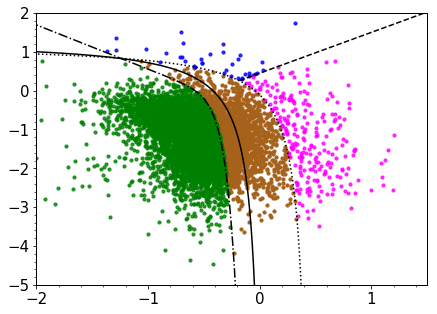

In [65]:
plot_co  = plt.scatter(xbpt[idx_co], ybpt[idx_co], c='#a6611a', s=10, alpha=1)
plot_sf  = plt.scatter(xbpt[idx_sf], ybpt[idx_sf], c='green', s=10, alpha=0.8)
plot_sy  = plt.scatter(xbpt[idx_sy], ybpt[idx_sy], c='blue', s=10, alpha=0.8)
plot_ln  = plt.scatter(xbpt[idx_ln], ybpt[idx_ln], c='magenta', s=10, alpha=0.8)
# plot_na  = plt.scatter(xbpt[idx_na], ybpt[idx_na], c='red', s=10, alpha=1)
plot02, = plt.plot(xbpt_k01, ybpt_k01, ':', color='black',  label='Kewley+01')
plot03, = plt.plot(xbpt_k03, ybpt_k03, '-', color='black',  label='Kauffman+03')
plot04, = plt.plot(xbpt_s06, ybpt_s06, '-.', color='black', label='Stasinska+06')
plot05, = plt.plot(xbpt_s07, ybpt_s07, '--', color='black', label='Schawinski+07')
plt.xlim(bpt_xlim)
plt.ylim(bpt_ylim)
plt.minorticks_on()
plt.tick_params('both', labelsize='15')
plt.xticks(np.arange(bpt_xlim[0], bpt_xlim[1], 1.))
plt.grid(alpha=0.0)
plt.show()

##### I now have both classifications: UV and BPT. Let's crossmatch these informations and count the amount of galaxies in each situation.

In [66]:
idxx_sf = np.where(bpt_class=='SF')
idxx_sy = np.where(bpt_class=='Seyfert')
idxx_ln = np.where(bpt_class=='LINER')
idxx_co = np.where(bpt_class=='Composite')

In [67]:
print "UV Classification & SF & Seyfert & LINER & Composite \\"
print "RSF               & %d & %d   & %d   & %d \\ " % (list(uv_class_bpt[idxx_sf]).count('RSF'), 
                                                         list(uv_class_bpt[idxx_sy]).count('RSF'), 
                                                         list(uv_class_bpt[idxx_ln]).count('RSF'), 
                                                         list(uv_class_bpt[idxx_co]).count('RSF'))
print "UV weak           & %d & %d   & %d   & %d \\ " % (list(uv_class_bpt[idxx_sf]).count('UV_WEAK'), 
                                                         list(uv_class_bpt[idxx_sy]).count('UV_WEAK'), 
                                                         list(uv_class_bpt[idxx_ln]).count('UV_WEAK'), 
                                                         list(uv_class_bpt[idxx_co]).count('UV_WEAK'))
print "UV upturn         & %d & %d   & %d   & %d \\ " % (list(uv_class_bpt[idxx_sf]).count('UV_UPTURN'), 
                                                         list(uv_class_bpt[idxx_sy]).count('UV_UPTURN'), 
                                                         list(uv_class_bpt[idxx_ln]).count('UV_UPTURN'), 
                                                         list(uv_class_bpt[idxx_co]).count('UV_UPTURN'))

UV Classification & SF & Seyfert & LINER & Composite \
RSF               & 9215 & 37   & 197   & 1974 \ 
UV weak           & 50 & 1   & 27   & 50 \ 
UV upturn         & 49 & 0   & 20   & 27 \ 


# Now we are evaluating the impact of UV upturn sources in redshift

In [68]:
bins = np.arange(0, (redshift[index_all]).max(), 0.05)
ratio_uvup_redseq = []
average_redshift = []
z_uv = []
z_rs = []
redshift_uvup = redshift[index_uvup]

for i in range(bins.size):
    if i==0:
        continue
    else:
        index_redseq_i = np.where((bins[i-1]<=redshift[index_redsequence])*(redshift[index_redsequence]<=bins[i]))
        index_uvup_i   = np.where((bins[i-1]<=redshift_uvup)*(redshift_uvup <= bins[i]))
        redshift_bin_redseq = redshift[index_redseq_i]
        redshift_bin_uvup   = redshift_uvup[index_uvup_i]
        if (redshift_bin_redseq.size==0):
            ratio_uvup_i = 0
            print "There are no UV Upturn galaxies in this range of redshift: %.2f and %.2f" % (bins[i-1], bins[i])
        else:
            ratio_uvup_i = (np.float(redshift_bin_uvup.size) / np.float(redshift_bin_redseq.size)) *100
            average_redshift_i = np.average((bins[i], bins[i-1]))
            average_redshift.append(average_redshift_i)
        z_uv.append(redshift_bin_uvup.size)
        z_rs.append(redshift_bin_redseq.size)
        ratio_uvup_redseq.append(ratio_uvup_i)
ratio_uvup_redseq = np.array(ratio_uvup_redseq)
z_uv = np.array(z_uv)
z_rs = np.array(z_rs)
average_redshift  = np.array(average_redshift)

There are no UV Upturn galaxies in this range of redshift: 0.00 and 0.05
There are no UV Upturn galaxies in this range of redshift: 0.45 and 0.50
There are no UV Upturn galaxies in this range of redshift: 0.50 and 0.55


In [69]:
print(average_redshift)
print(z_uv)

[0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425]
[  0  60 137 121  44  61  18   2   1   0   0]


In [70]:
n_groups = bins.size
index = np.arange(1,n_groups,1)
fraction = {}
fraction['index'] = index
fraction['ratio'] = ratio_uvup_redseq
fraction['bins']  = bins[:-1].astype(float)
frac_df = pd.DataFrame(fraction)

In [71]:
idx_not_bpt= np.where(np.logical_not((np.logical_not(np.isnan(np.log10(nii_flux[index_all]/h_alpha_flux[index_all]))))
                           *(np.logical_not(np.isinf(np.log10(nii_flux[index_all]/h_alpha_flux[index_all]))))
                           *(np.logical_not(np.isnan(np.log10(oiii_flux[index_all]/h_beta_flux[index_all]))))
                           *(np.logical_not(np.isinf(np.log10(oiii_flux[index_all]/h_beta_flux[index_all]))))
                           *(np.logical_not(h_alpha_flux[index_all]<=0))*(np.logical_not(h_beta_flux[index_all]<=0))
                           *(np.logical_not(nii_flux[index_all]<=0))*(np.logical_not(oiii_flux[index_all]<=0))))            

/home/mlldantas/anaconda3/envs/py2k7/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/home/mlldantas/anaconda3/envs/py2k7/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


In [72]:
print idx_not_bpt
print idx_bpt_clean
print (uv_class[index_all][idx_not_bpt]).size
print (uv_class[index_all][idx_bpt_clean]).size
print (uv_class[index_all][idx_not_bpt]).size + (uv_class[index_all][idx_bpt_clean]).size

(array([    3,    10,    17, ..., 14318, 14320, 14325]),)
(array([    0,     1,     2, ..., 14328, 14329, 14330]),)
2684
11647
14331


In [73]:
idx_not_whan = np.where(np.logical_not((np.logical_not(np.isnan(np.log10(nii_flux[index_all]/h_alpha_flux[index_all]))))
                          *(np.logical_not(np.isinf(np.log10(nii_flux[index_all]/h_alpha_flux[index_all]))))
                          *(np.logical_not(np.isnan(np.log10(h_alpha_ew[index_all]))))
                          *(np.logical_not(np.isinf(np.log10(h_alpha_ew[index_all]))))
                          *(np.logical_not(h_alpha_flux[index_all]<=0))*(np.logical_not(nii_flux[index_all]<=0))
                          *(np.logical_not(h_alpha_ew[index_all]<=0))))

/home/mlldantas/anaconda3/envs/py2k7/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/home/mlldantas/anaconda3/envs/py2k7/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  
/home/mlldantas/anaconda3/envs/py2k7/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


In [74]:
print np.array(idx_not_whan).size
print np.unique(uv_class[index_all][idx_not_whan])
print (uv_class[index_all][idx_not_whan]).size + (uv_class[index_all][idx_whan_clean]).size

1281
['RSF' 'UV_UPTURN' 'UV_WEAK']
14331


In [75]:
print list(uv_class[index_all][idx_not_bpt]).count('UV_UPTURN')
print list(uv_class[index_all][idx_not_bpt]).count('UV_WEAK')
print list(uv_class[index_all][idx_not_bpt]).count('RSF')

114
168
2402


In [76]:
print list(uv_class[index_all][idx_not_whan]).count('UV_UPTURN')
print list(uv_class[index_all][idx_not_whan]).count('UV_WEAK')
print list(uv_class[index_all][idx_not_whan]).count('RSF')

29
62
1190


In [77]:
print uv_class[index_all][idx_not_whan].size
print uv_class[index_all][idx_whan_clean].size

1281
13050


In [78]:
emlines_not_bpt = []
for i in range(np.array(idx_not_bpt).size):
    emlines_not_bpt.append('NA')
emlines_not_bpt = np.array(emlines_not_bpt)

In [79]:
emlines_not_whan = []
for i in range(np.array(idx_not_whan).size):
    emlines_not_whan.append('NA')
emlines_not_whan = np.array(emlines_not_whan)

In [80]:
idxs_bpt_temp = idx_bpt_clean + idx_not_bpt
idxs_bpt = list(idxs_bpt_temp[0])+list(idxs_bpt_temp[1])
print len(idxs_bpt)

14331


### Now we are going to add these information into the whole dataset, in case we need it in the future

In [81]:
bpt_catai_temp1 = pd.DataFrame(cataid[index_all][idx_bpt_clean])
bpt_class_temp1 = pd.DataFrame(bpt_class)
bpt_pos = pd.concat([bpt_catai_temp1, bpt_class_temp1], axis=1)
bpt_pos.columns = ['CATAID', 'BPT_CLASS']

bpt_catai_temp2 = pd.DataFrame(cataid[index_all][idx_not_bpt])
bpt_class_temp2 = pd.DataFrame(emlines_not_bpt)
bpt_neg = pd.concat([bpt_catai_temp2, bpt_class_temp2], axis=1)
bpt_neg.columns = ['CATAID', 'BPT_CLASS']

bpt_all = pd.concat([bpt_pos, bpt_neg])

In [82]:
print np.unique(bpt_all['CATAID']).size

14331


In [83]:
whan_catai_temp1 = pd.DataFrame(cataid[index_all][idx_whan_clean])
whan_class_temp1 = pd.DataFrame(whan_class)
whan_pos = pd.concat([whan_catai_temp1, whan_class_temp1], axis=1)
whan_pos.columns = ['CATAID', 'WHAN_CLASS']

whan_catai_temp2 = pd.DataFrame(cataid[index_all][idx_not_whan])
whan_class_temp2 = pd.DataFrame(emlines_not_whan)
whan_neg = pd.concat([whan_catai_temp2, whan_class_temp2], axis=1)
whan_neg.columns = ['CATAID', 'WHAN_CLASS']

whan_all = pd.concat([whan_pos, whan_neg])

In [84]:
print np.unique(whan_all['CATAID']).size

14331


In [85]:
my_df_temp = pd.DataFrame(my_data[index_all+1])
my_df_temp.columns = my_data[0,:]

In [86]:
my_df_temp2 = my_df_temp.set_index('CATAID').join(bpt_all.set_index('CATAID')).join(whan_all.set_index('CATAID'))

In [87]:
my_df_temp2['BPT_CLASS'].value_counts(dropna=False)

SF           9314
NA           2684
Composite    2051
LINER         244
Seyfert        38
Name: BPT_CLASS, dtype: int64

In [88]:
my_df_temp2['WHAN_CLASS'].value_counts(dropna=False)

SF                 9399
sAGN               2184
NA                 1281
Retired/Passive     874
wAGN                593
Name: WHAN_CLASS, dtype: int64

In [89]:
my_df_temp2.to_csv('../../Catalogue/Match07_smalldoubleclean_emlines.csv', index=True)

In [90]:
my_df_temp2

,OBJID_SDSSDR7,ALPHA_J2000,DELTA_J2000,KRON_RADIUS,PETRO_RADIUS,MAG_PETRO_u,MAGERR_PETRO_u,FLAGS_u,MAG_PETRO_g,MAGERR_PETRO_g,...,MAG_ABSOLUTE_I,MAG_ABSOLUTE_Z,MAG_ABSOLUTE_Y,MAG_ABSOLUTE_J,MAG_ABSOLUTE_H,MAG_ABSOLUTE_K,UV_CLASS_YI2011,TYPE,BPT_CLASS,WHAN_CLASS
CATAID,,,,,,,,,,,,,,,,,,,,,
585610,588848899914268877,183.6357,-0.180381,3.5,4.62,21.032,0.0486,2,19.7814,0.0117,...,-21.7902385393,-21.937685223,-21.5340647559,-21.6717684485,-21.3333735804,-21.3818760378,RSF,3,SF,SF
585622,588848899914334317,183.7372,-0.0466417,3.5,4.62,20.2965,0.0263,0,18.8096,0.0069,...,-20.5392170656,-20.8503917277,-20.3999121564,-20.4258702896,-20.1886827376,-19.9505010862,RSF,3,SF,SF
585630,588848899914334392,183.8403,-0.0451703,3.5,4.62,20.6158,0.0314,2,19.4969,0.0099,...,-21.5012792562,-21.6326590794,-21.0992733555,-21.0824105454,-20.7890692855,-20.8249112016,RSF,3,SF,SF
585637,588848899914334460,183.7989,-0.0599958,3.5,5.28,21.586,0.1193,2,19.8666,0.0154,...,-22.5778483824,-22.980032517,-22.4292620689,-22.6494917932,-22.5216849358,-22.5131927791,RSF,3,NA,Retired/Passive
585667,588848899914399953,183.8874,-0.0767733,3.5,5.28,21.0229,0.0584,0,19.8678,0.0138,...,-22.7889989346,-23.2477999772,-22.647159202,-22.7579482107,-22.620588756,-22.781031442,RSF,3,SF,sAGN
585678,588848899914400032,183.9303,-0.1875282,3.5,4.62,20.5123,0.0343,0,19.5532,0.0107,...,-21.526567003,-21.6932762091,-21.1498124701,-21.1817595774,-20.8726007106,-20.9173475976,RSF,3,SF,SF
585699,588848899914465478,184.1426,-0.1830265,3.5,5.28,19.9645,0.0241,0,19.0083,0.0081,...,-19.7604714361,-19.8381018959,-19.3269929988,-19.1562171806,-18.8542015322,-18.269573187,RSF,3,SF,SF
585760,588848899914531038,184.312,-0.0304683,3.5,4.62,20.8745,0.0425,2,19.7977,0.0121,...,-22.1645169539,-22.5332899031,-22.0918570013,-22.3775941997,-22.1801868273,-22.3324816515,RSF,3,SF,SF
585765,588848899914531072,184.2153,-0.1887219,3.5,5.28,21.1063,0.0672,0,19.4727,0.0108,...,-19.3696044214,-19.595079321,-19.2327279089,-19.1535944082,-18.9017592726,-18.4283813987,RSF,3,SF,SF


In [91]:
my_df_na_uvup = my_df_temp2[my_df_temp2['WHAN_CLASS']=='NA']
my_df_na_uvup = my_df_na_uvup.loc[my_df_na_uvup['UV_CLASS_YI2011']=='UV_UPTURN']

my_df_rp_uvup = my_df_temp2[my_df_temp2['WHAN_CLASS']=='Retired/Passive']
my_df_rp_uvup = my_df_rp_uvup.loc[my_df_rp_uvup['UV_CLASS_YI2011']=='UV_UPTURN']

In [92]:
x_na_uvup, y_na_uvup = np.unique(my_df_na_uvup['BPT_CLASS'].replace({'NA': 'Unclassified'}).values.astype(str), return_counts=True)
x_rp_uvup, y_rp_uvup = np.unique(my_df_rp_uvup['BPT_CLASS'].replace({'NA': 'Unclassified'}).values.astype(str), return_counts=True)

na_all_uvup = np.sum(y_na_uvup)
rp_all_uvup = np.sum(y_rp_uvup)

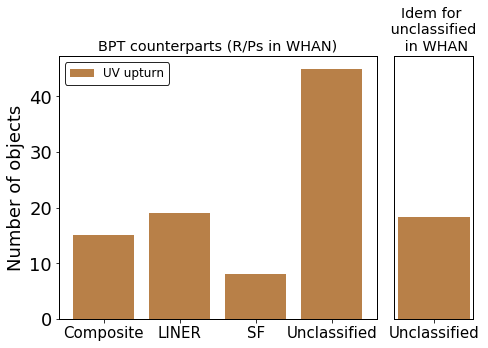

In [93]:
text_bbox_wk = dict(facecolor='#f0f0f0', edgecolor='black', boxstyle='round')
text_bbox_up = dict(facecolor='#d9d9d9', edgecolor='black', boxstyle='round')

fig = plt.figure()

plt.rcParams.update(plotpars)
plt.rcParams['xtick.labelsize'] = 15

grid = GridSpec(1,2, width_ratios=[4.,1.])
fig_rp = fig.add_subplot(grid[0,0])
fig_na = fig.add_subplot(grid[0,1])

fig_rp.bar(x=x_rp_uvup, height=y_rp_uvup, color='#a6611a', alpha=0.8, label="UV upturn")
fig_rp.set_ylabel("Number of objects")
fig_rp.legend(loc='best')
fig_rp.set_title("BPT counterparts (R/Ps in WHAN)")

fig_na.bar(x=x_na_uvup, height=y_na_uvup, color='#a6611a', alpha=0.8, label="UV upturn")
fig_na.set_ylim([0,75])
fig_na.yaxis.set_visible(False)
fig_na.set_title('Idem for \n unclassified \n in WHAN')

plt.tight_layout(w_pad=0.)
plt.savefig('../../LargeFilesResults/PaperFigs/g2_proportionsI.png', bbox='tight')
plt.savefig('../../LargeFilesResults/PaperFigs/g2_proportionsI.pdf', bbox='tight')
plt.show()

In [95]:
my_df_na_uvwk = my_df_temp2[my_df_temp2['WHAN_CLASS']=='NA']
my_df_na_uvwk = my_df_na_uvwk.loc[my_df_na_uvwk['UV_CLASS_YI2011']=='UV_WEAK']

my_df_rp_uvwk = my_df_temp2[my_df_temp2['WHAN_CLASS']=='Retired/Passive']
my_df_rp_uvwk = my_df_rp_uvwk.loc[my_df_rp_uvwk['UV_CLASS_YI2011']=='UV_WEAK']

In [96]:
x_na_uvwk, y_na_uvwk = np.unique(my_df_na_uvwk['BPT_CLASS'].replace({'NA': 'Unclassified'}).values.astype(str), 
                                 return_counts=True)
x_rp_uvwk, y_rp_uvwk = np.unique(my_df_rp_uvwk['BPT_CLASS'].replace({'NA': 'Unclassified'}).values.astype(str), 
                                 return_counts=True)
na_all_uvwk = np.sum(y_na_uvwk)
rp_all_uvwk = np.sum(y_rp_uvwk)

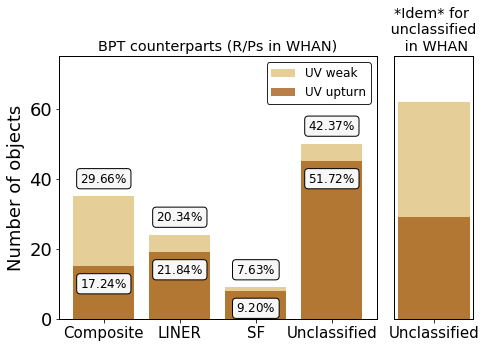

In [97]:
text_bbox_wk = dict(facecolor='#f0f0f0', edgecolor='black', boxstyle='round')
text_bbox_up = dict(facecolor='#d9d9d9', edgecolor='black', boxstyle='round')

fig = plt.figure()

plt.rcParams.update(plotpars)
plt.rcParams['xtick.labelsize'] = 15

grid = GridSpec(1,2, width_ratios=[4.,1.])
fig_rp = fig.add_subplot(grid[0,0])
fig_na = fig.add_subplot(grid[0,1])

fig_rp.bar(x=x_rp_uvwk, height=y_rp_uvwk, color='#dfc27d', alpha=0.8, label="UV weak")
fig_rp.bar(x=x_rp_uvup, height=y_rp_uvup, color='#a6611a', alpha=0.8, label="UV upturn")
for i in range(x_rp_uvup.size):
    frac01 = (y_rp_uvup[i]/rp_all_uvup)*100
    fig_rp.text(x=x_rp_uvup[i], y=y_rp_uvup[i]-5, s='$%.2f\%%$' % (frac01), horizontalalignment='center', 
                verticalalignment='center', bbox=text_bbox)
    frac02 = (y_rp_uvwk[i]/rp_all_uvwk)*100
    fig_rp.text(x=x_rp_uvwk[i], y=y_rp_uvwk[i]+5, s='$%.2f\%%$' % (frac02), horizontalalignment='center', 
                verticalalignment='center', bbox=text_bbox)
fig_rp.set_ylim([0,75])
fig_rp.set_ylabel("Number of objects")
fig_rp.legend(loc='best')
fig_rp.set_title("BPT counterparts (R/Ps in WHAN)")

fig_na.bar(x=x_na_uvwk, height=y_na_uvwk, color='#dfc27d', alpha=0.8, label="UV weak")
fig_na.bar(x=x_na_uvup, height=y_na_uvup, color='#a6611a', alpha=0.8, label="UV upturn")
fig_na.set_ylim([0,75])
fig_na.yaxis.set_visible(False)
fig_na.set_title('*Idem* for \n unclassified \n in WHAN')

plt.tight_layout(w_pad=0.)
plt.savefig('../../LargeFilesResults/PaperFigs/g2_proportionsII.png', bbox='tight')
plt.savefig('../../LargeFilesResults/PaperFigs/g2_proportionsII.pdf', bbox='tight')
plt.show()

In [98]:
my_df_uvwk = pd.concat([my_df_rp_uvwk, my_df_na_uvwk])
my_df_uvup = pd.concat([my_df_rp_uvup, my_df_na_uvup])
my_df_pie  = pd.concat([my_df_uvwk, my_df_uvup])
uv_unique  = np.unique(my_df_pie['UV_CLASS_YI2011'].values, return_counts=True)
bpt_unique = np.unique(my_df_pie['BPT_CLASS'].values, return_counts=True)

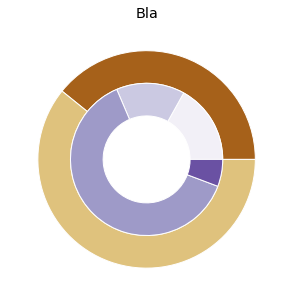

In [99]:
size=0.3

outer_colors = ['#a6611a', '#dfc27d']
inner_colors = ['#f2f0f7','#cbc9e2','#9e9ac8','#6a51a3']

fig, ax = plt.subplots()
plt.rcParams.update(plotpars)

ax.pie(x=uv_unique[1], radius=1, colors=outer_colors, wedgeprops=dict(width=size, edgecolor='w'),)
ax.pie(x=bpt_unique[1], radius=1-size, colors=inner_colors, wedgeprops=dict(width=size, edgecolor='w'))
ax.set(aspect="equal", title='Bla')
plt.show()

In [101]:
# for i in my_df_temp2.keys():
#     print i

OBJID_SDSSDR7
ALPHA_J2000
DELTA_J2000
KRON_RADIUS
PETRO_RADIUS
MAG_PETRO_u
MAGERR_PETRO_u
FLAGS_u
MAG_PETRO_g
MAGERR_PETRO_g
FLAGS_g
MAG_PETRO_r
MAGERR_PETRO_r
FLAGS_r
MAG_PETRO_i
MAGERR_PETRO_i
FLAGS_i
MAG_PETRO_z
MAGERR_PETRO_z
FLAGS_z
MAG_PETRO_X
MAGERR_PETRO_X
FLAGS_X
MAG_PETRO_Y
MAGERR_PETRO_Y
FLAGS_Y
MAG_PETRO_J
MAGERR_PETRO_J
FLAGS_J
MAG_PETRO_H
MAGERR_PETRO_H
FLAGS_H
MAG_PETRO_K
MAGERR_PETRO_K
FLAGS_K
FLAGS
PSFMAG_R
FIBERMAG_R
FLAGS_R_SDSS
PETRORAD_R
PETROR90_R
PETROR50_R
PETROMAG_R
MODELMAG_U
MODELMAG_G
MODELMAG_R
MODELMAG_I
MODELMAG_Z
STATUS
BEST_MAG_NUV
BEST_MAGERR_NUV
BEST_MAG_FUV
BEST_MAGERR_FUV
BEST_METHOD
NMATCHUV
NMATCHOPT
NUVFLAG
FUVFLAG
NN_DIST
NN_NMATCH4
NN_MANY2ONE
NN_SFLAGS_NUV
NN_SFLAGS_FUV
KCORR_FUV
KCORR_NUV
KCORR_U
KCORR_G
KCORR_R
KCORR_I
KCORR_Z
KCORR_Y
KCORR_J
KCORR_H
KCORR_K
CHI2
MASS
INTSFH
METS
B300
B1000
SURVEY_CODE
SURVEY_CLASS
nbands
S2N
PPP
logmstar
dellogmstar
logmoverl_i
dellogmoverl_i
logage
dellogage
logtau
dellogtau
logmintsfh
dellogmintsfh
logmre